`About Dataset`
Context
Machine Learning with R by Brett Lantz is a book that provides an introduction to machine learning using R. As far as I can tell, Packt Publishing does not make its datasets available online unless you buy the book and create a user account which can be a problem if you are checking the book out from the library or borrowing the book from a friend. All of these datasets are in the public domain but simply needed some cleaning up and recoding to match the format in the book.

Content
Columns

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

In [129]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler ,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [130]:
Medical_Cost=pd.read_csv("/content/insurance.csv")

In [131]:
Medical_Cost.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [132]:
Medical_Cost.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [133]:
Medical_Cost.shape

(1338, 7)

In [134]:
Medical_Cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [135]:
Medical_Cost.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [136]:
Medical_Cost.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [137]:
Medical_Cost.corr()

<ipython-input-137-b44285b5f332>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Medical_Cost.corr()


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


#Data Visualization#

In [138]:
Medical_Cost.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [139]:
Medical_Cost['bmi_int']=Medical_Cost['bmi'].apply(lambda x:int(x))
varibales=['age', 'sex', 'bmi_int', 'children', 'smoker', 'region']

# Data distribution analysys#

data distribution analysys


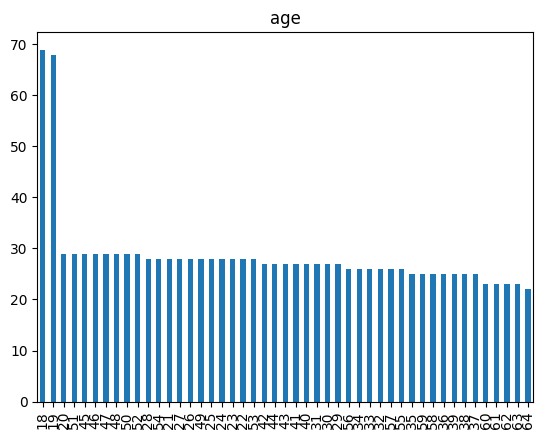

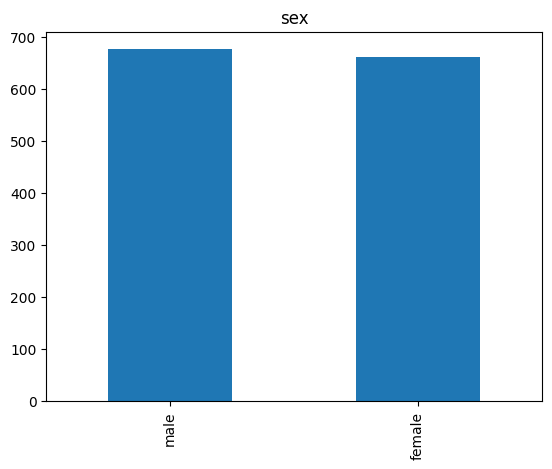

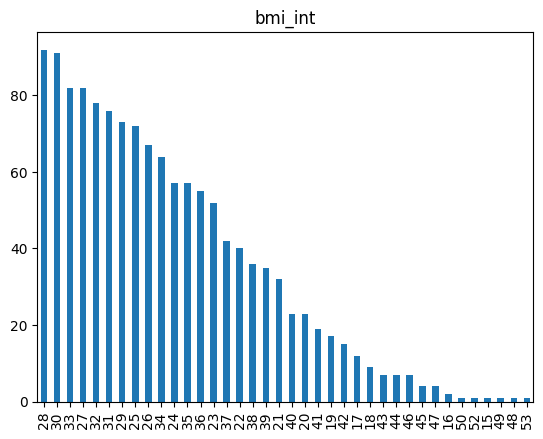

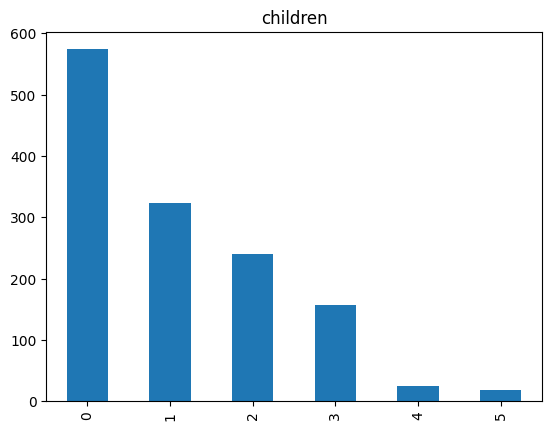

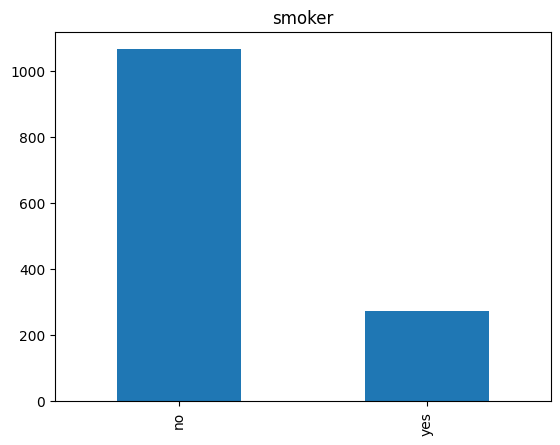

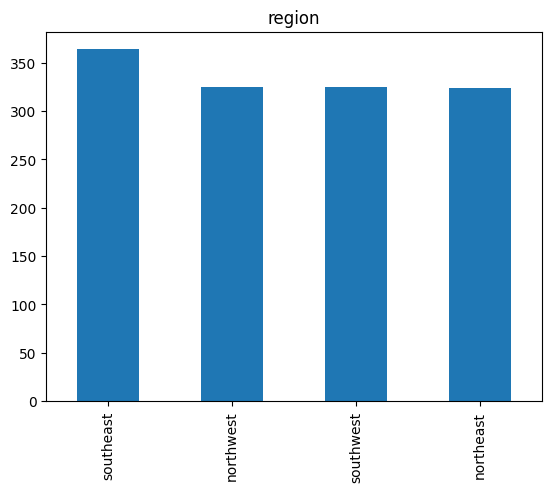

In [140]:
print("data distribution analysys")
for v in varibales :
  Medical_Cost=Medical_Cost.sort_values(by=v)
  Medical_Cost[v].value_counts().plot(kind="bar")
  plt.title(v)
  plt.show()


#average cost analysis#

mean cost analysis


<ipython-input-141-1079376630b5>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_df=Medical_Cost.groupby(pd.Grouper(key=v)).mean()


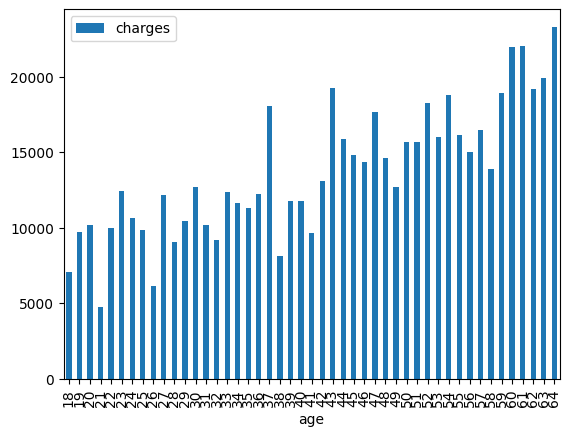

<ipython-input-141-1079376630b5>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_df=Medical_Cost.groupby(pd.Grouper(key=v)).mean()


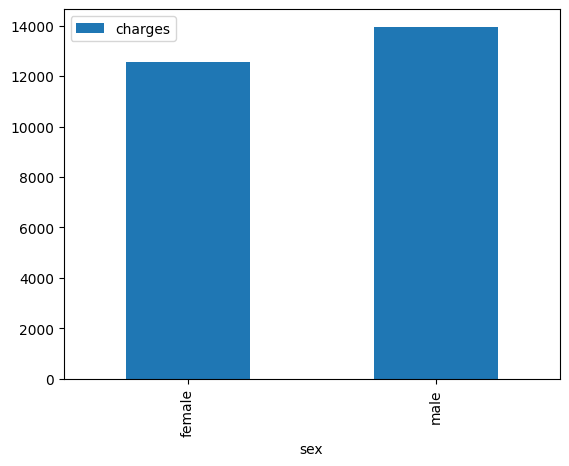

<ipython-input-141-1079376630b5>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_df=Medical_Cost.groupby(pd.Grouper(key=v)).mean()


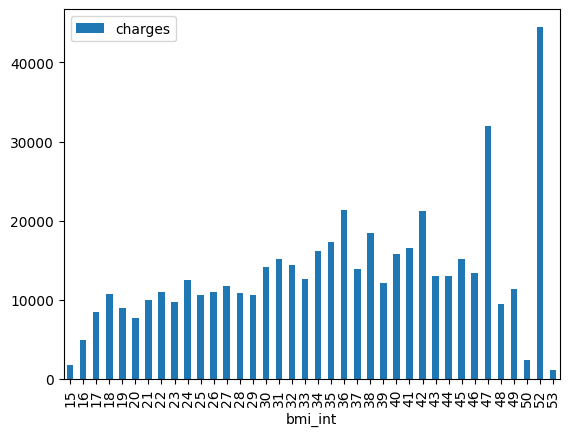

<ipython-input-141-1079376630b5>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_df=Medical_Cost.groupby(pd.Grouper(key=v)).mean()


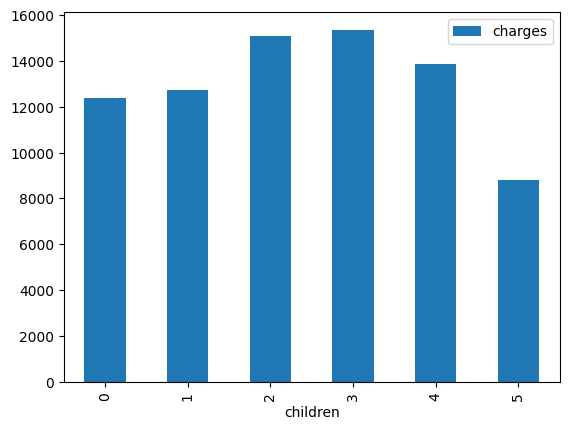

<ipython-input-141-1079376630b5>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_df=Medical_Cost.groupby(pd.Grouper(key=v)).mean()


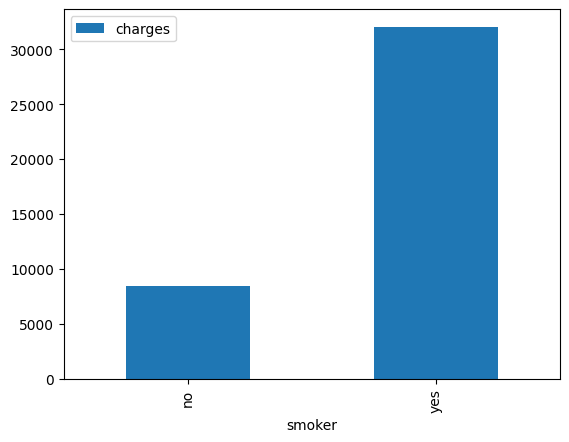

<ipython-input-141-1079376630b5>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_df=Medical_Cost.groupby(pd.Grouper(key=v)).mean()


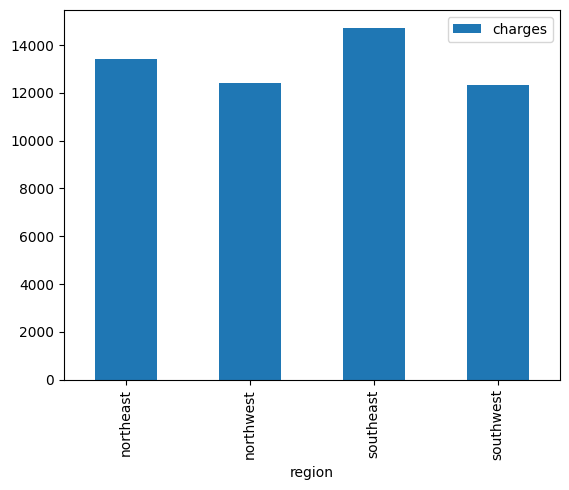

In [141]:
print("mean cost analysis")
for v in varibales :
  group_df=Medical_Cost.groupby(pd.Grouper(key=v)).mean()
  group_df = group_df.sort_index()
  group_df.plot(y = ['charges'],kind = 'bar')
  plt.show()

#variables pairplot#

Variables pairplot:


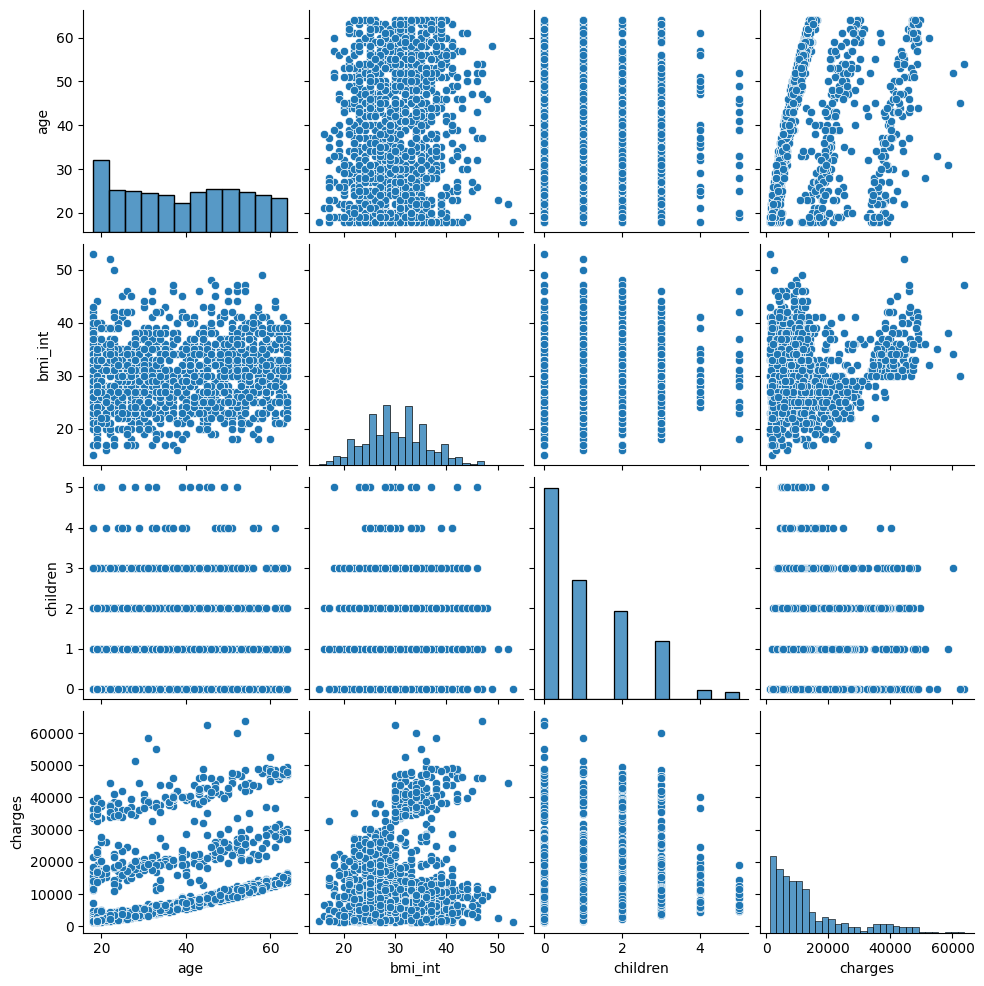

In [142]:
#variables pairplot
print('Variables pairplot:')
variables = ['sex','smoker','region','age','bmi_int','children','charges']
sns_plot = sns.pairplot(Medical_Cost[variables])
plt.show()

#LabelEncoder#

In [143]:
le=LabelEncoder()
Medical_Cost['sex']=le.fit_transform(Medical_Cost["sex"])
Medical_Cost['smoker']=le.fit_transform(Medical_Cost['smoker'])
Medical_Cost["region"]=le.fit_transform(Medical_Cost['region'])

#StandardScaler#

In [144]:
st=StandardScaler()
x=Medical_Cost.drop(['charges'],axis=1)
X=st.fit_transform(x)
y=Medical_Cost["charges"]

In [154]:
X

array([[-1.50996545,  0.98959079, -2.41201109, ..., -0.5074631 ,
        -1.37232554, -2.47967941],
       [ 0.12766192, -1.0105187 ,  0.40873374, ..., -0.5074631 ,
        -1.37232554,  0.46265684],
       [-1.36756307,  0.98959079, -0.44839867, ..., -0.5074631 ,
        -1.37232554, -0.51812191],
       ...,
       [ 0.98207621,  0.98959079, -0.33848887, ..., -0.5074631 ,
         1.34390459, -0.35465878],
       [-0.79795355,  0.98959079,  0.94105808, ...,  1.97058663,
         1.34390459,  0.95304622],
       [-1.08275831, -1.0105187 , -0.50253335, ..., -0.5074631 ,
         1.34390459, -0.51812191]])

In [145]:
y

172      1694.79640
179      8538.28845
495      1967.02270
645     10141.13620
366     13430.26500
           ...     
232      1727.78500
139      2166.73200
1101    11253.42100
34      51194.55914
340     18955.22017
Name: charges, Length: 1338, dtype: float64

In [153]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [155]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1070, 7), (268, 7), (1070,), (268,))

In [159]:
ex=ExtraTreesRegressor(n_estimators = 200)
ex.fit(x_train,y_train)

ExtraTreesRegressor(n_estimators=200)

#Train#

In [160]:
y_pred_train=ex.predict(x_train)
print('Mean Absolute Error:', mean_absolute_error(y_train, y_pred_train))
print('Mean Squared Error:', mean_squared_error(y_train, y_pred_train))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('R^2 Score:', r2_score(y_train, y_pred_train))

Mean Absolute Error: 29.572515327132653
Mean Squared Error: 244239.5543823394
Root Mean Squared Error: 494.20598375812835
R^2 Score: 0.9982844894228875


#Test#

In [161]:
y_pred=ex.predict(x_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R^2 Score:', r2_score(y_test, y_pred))


Mean Absolute Error: 2815.49846977388
Mean Squared Error: 27883443.32475061
Root Mean Squared Error: 5280.477565973612
R^2 Score: 0.827867285701797
